In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 55.3 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import entropy
import matplotlib.pyplot as plt
import sweetviz as sv

In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/Prueba técnica/Dataton/declaraciones.csv', sep='\t')

<ipython-input-84-cf066d85610a>:1: DtypeWarning: Columns (0,3,9,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/gdrive/MyDrive/Prueba técnica/Dataton/declaraciones.csv', sep='\t')


In [ ]:
report_data = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
data.drop(index=0, inplace=True)


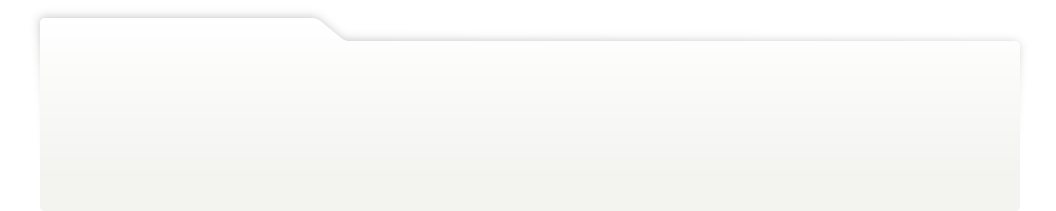
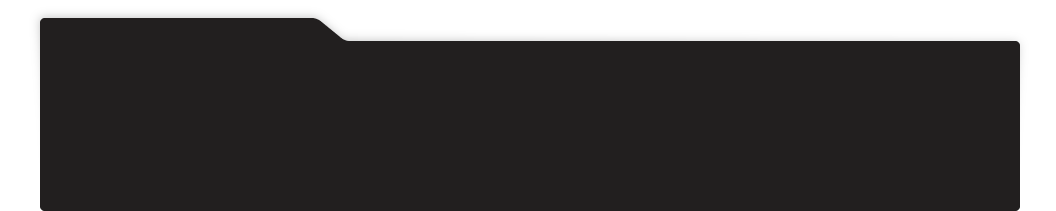
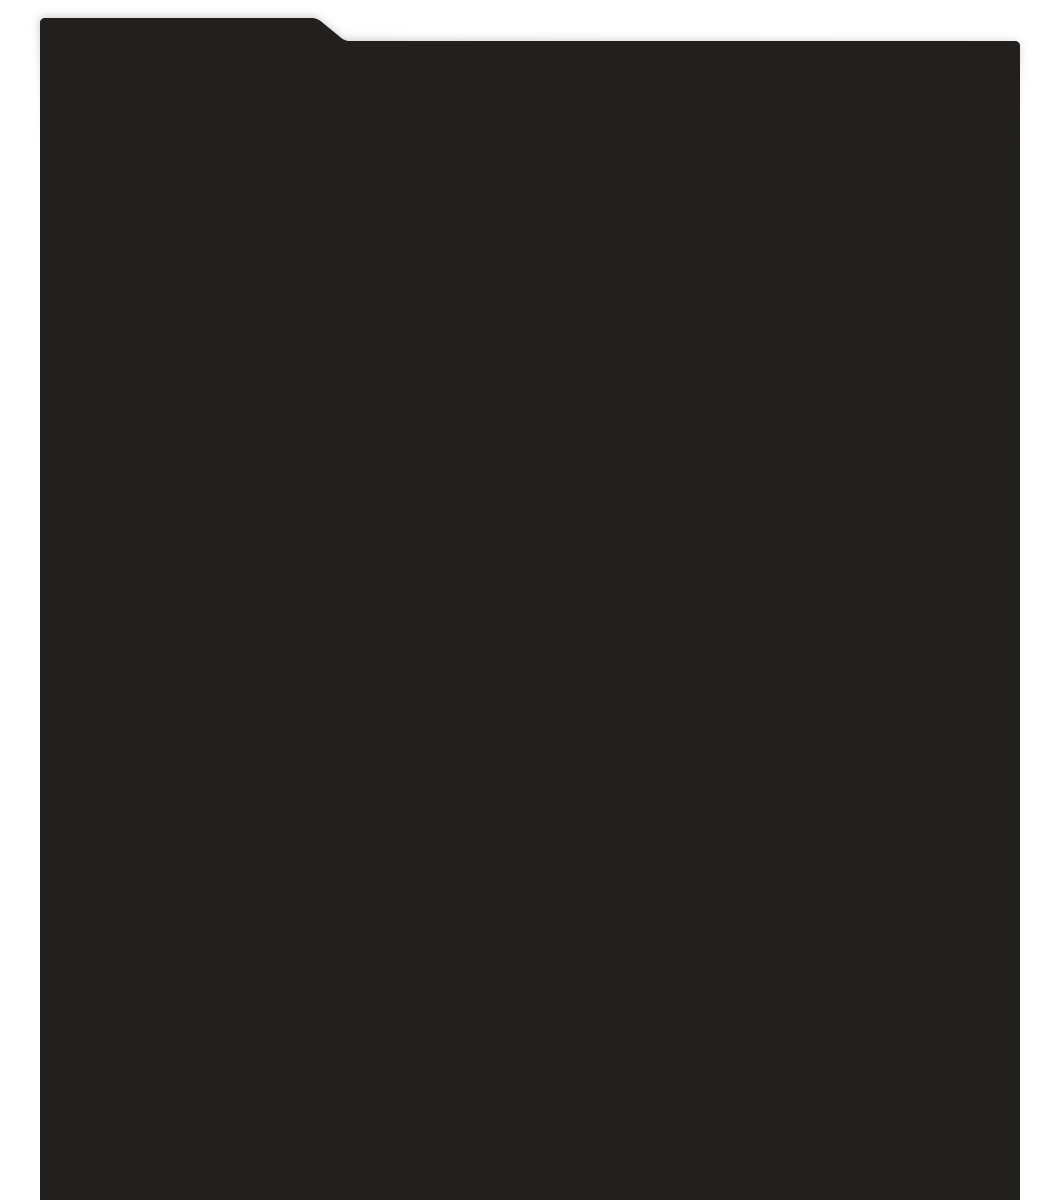
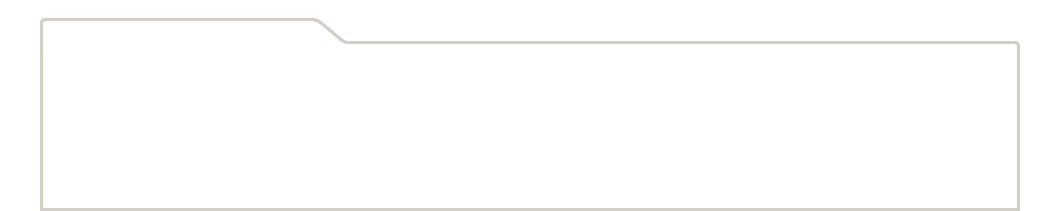
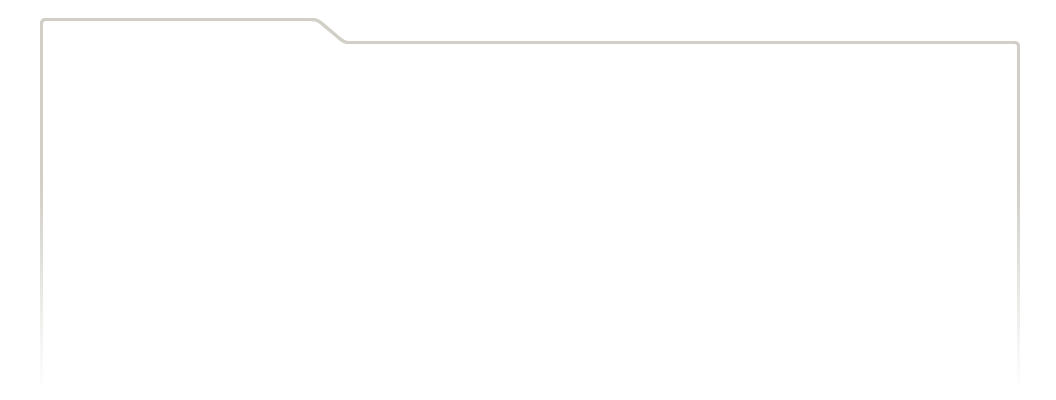
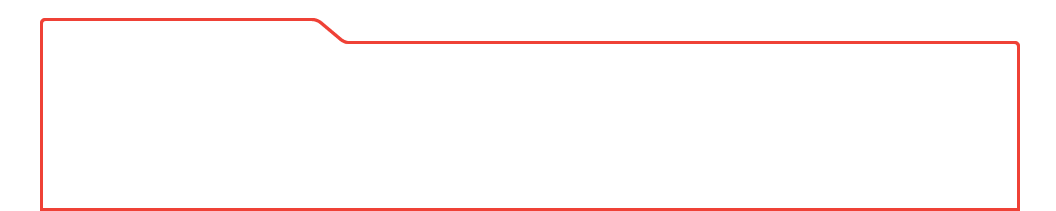
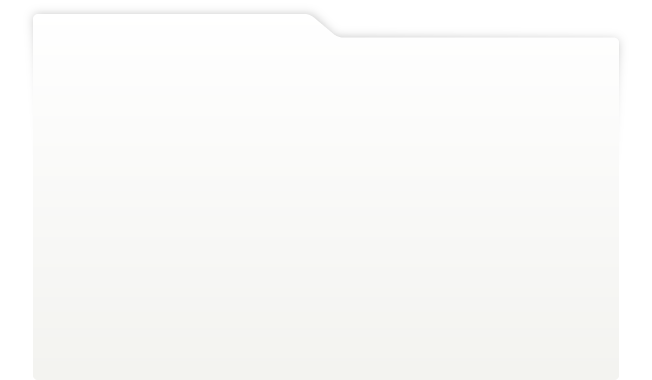
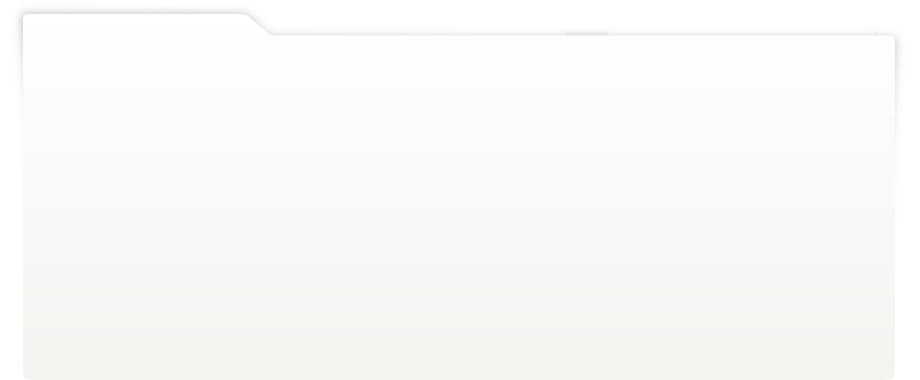
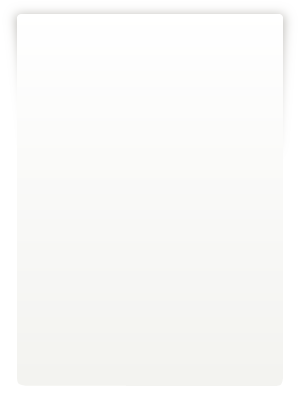
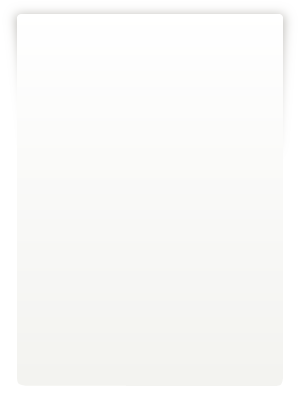
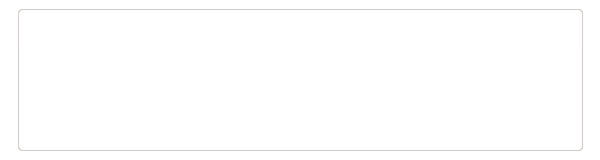
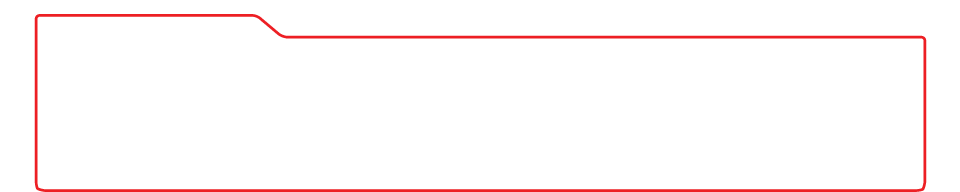
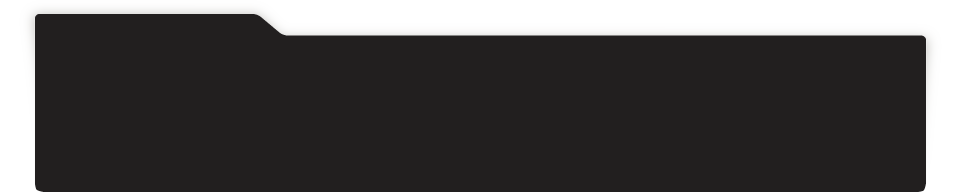
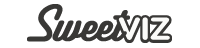
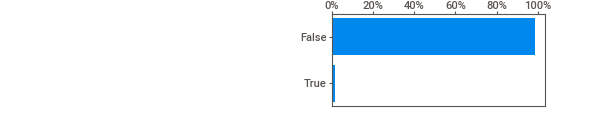
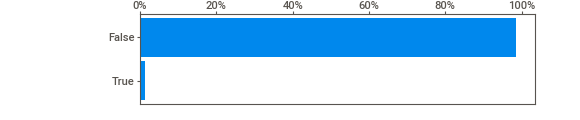
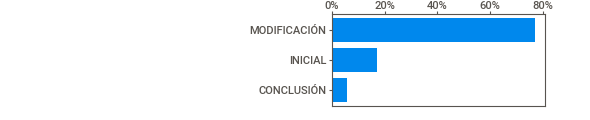
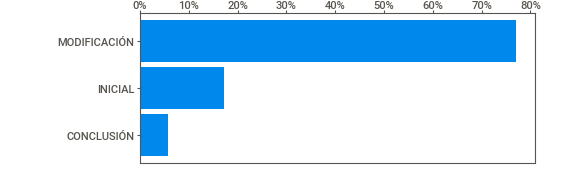
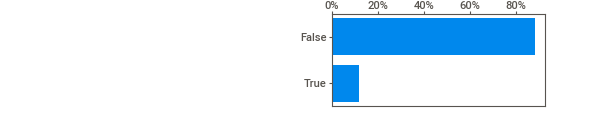
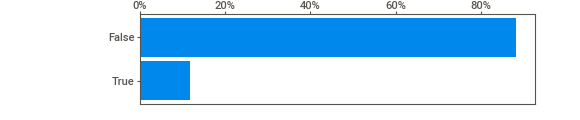
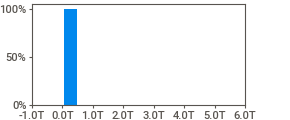
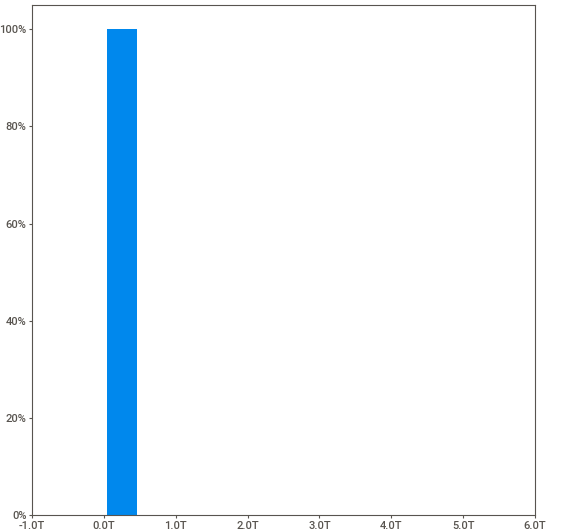
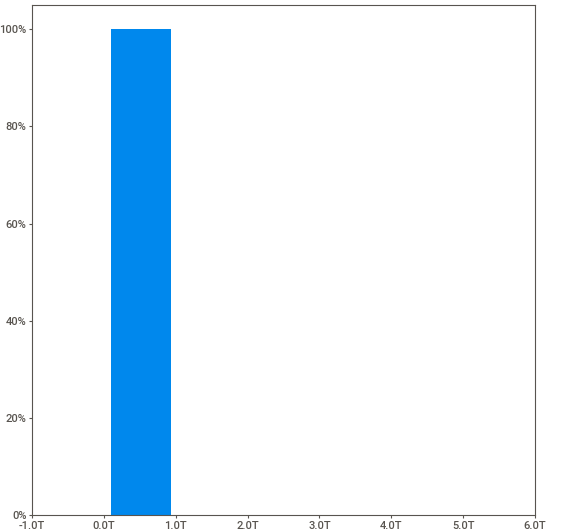
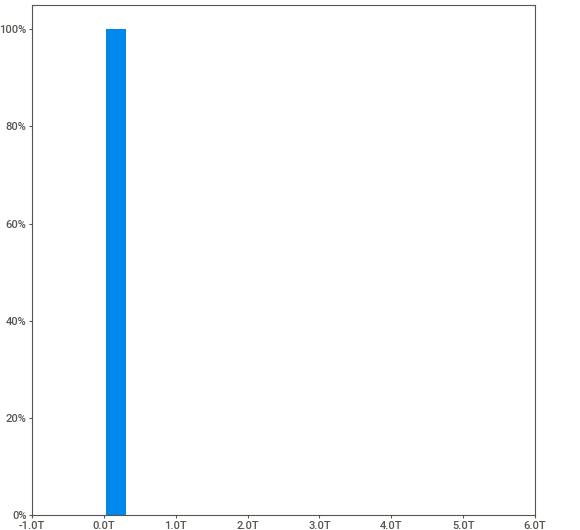
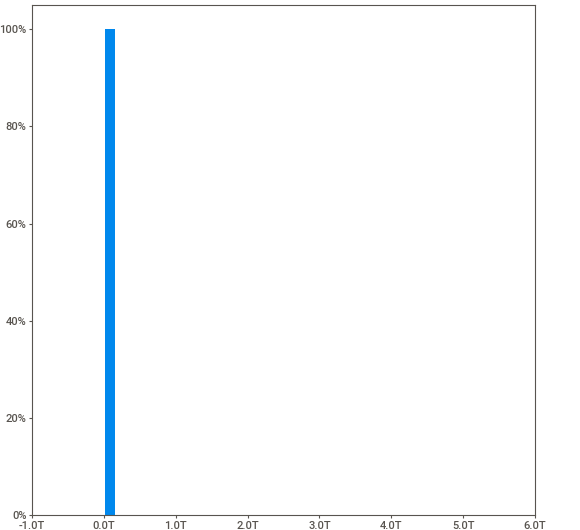
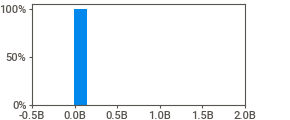
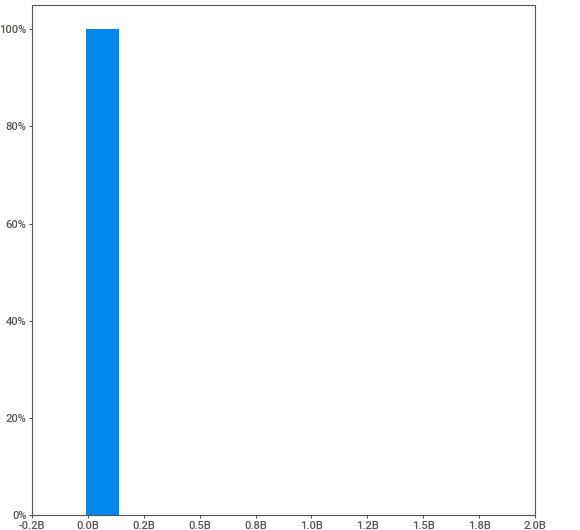
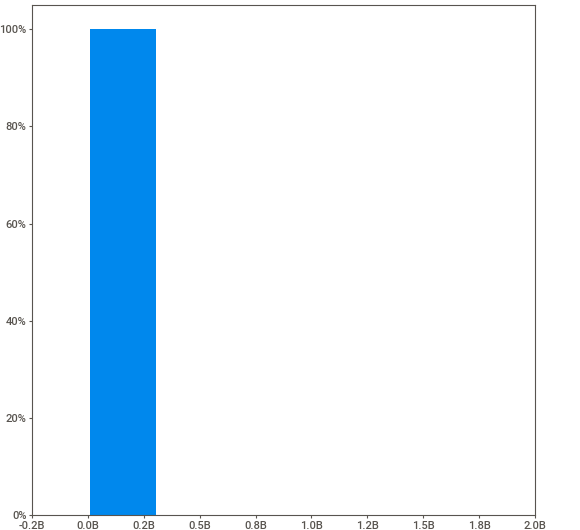
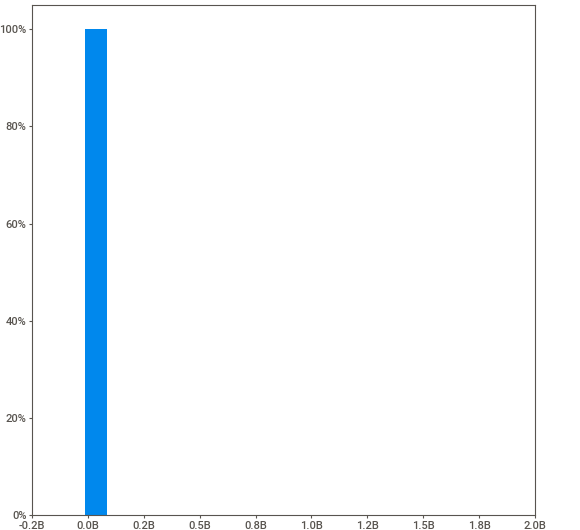
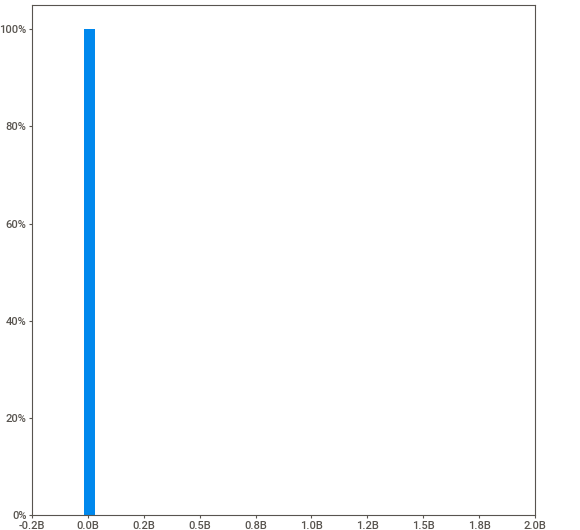
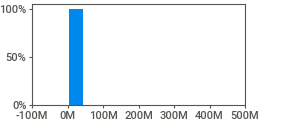
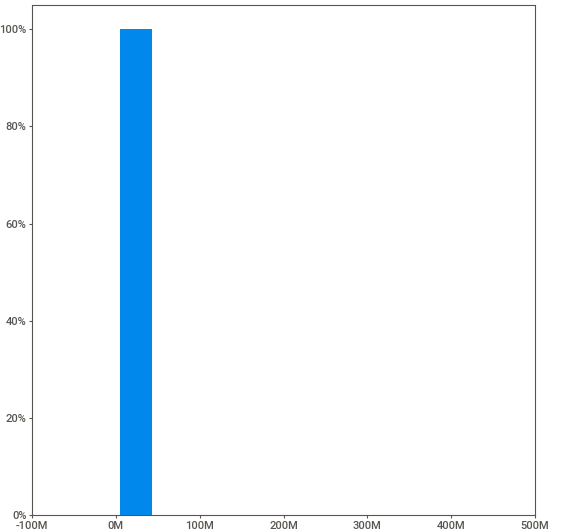
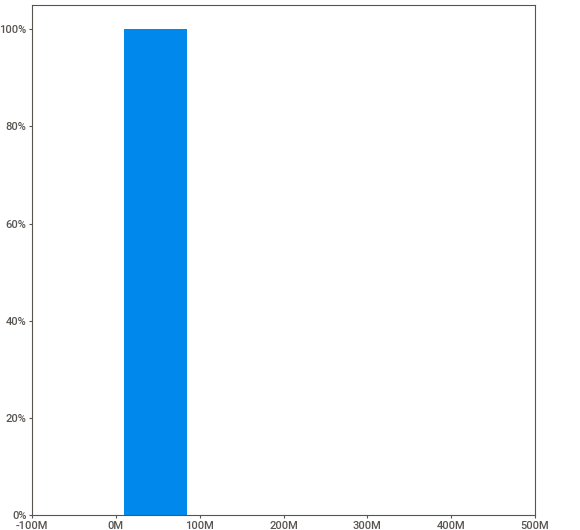
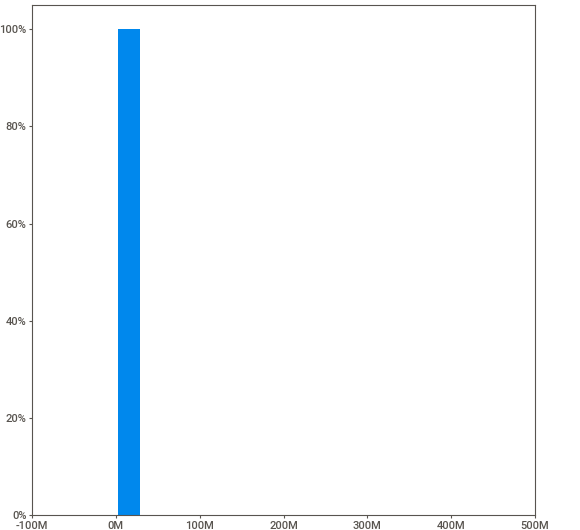
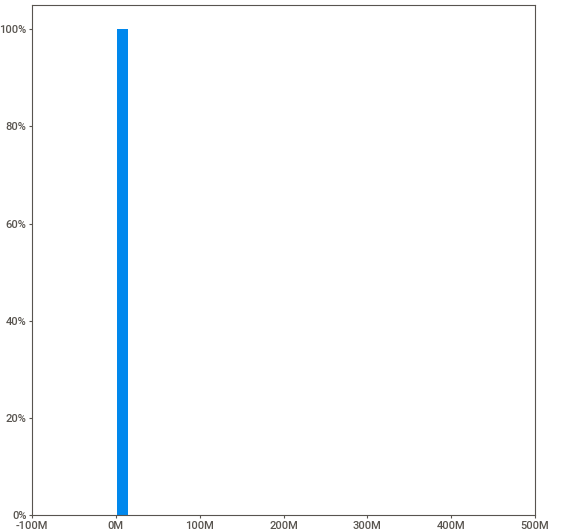
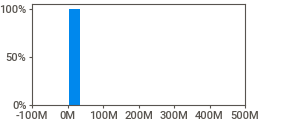
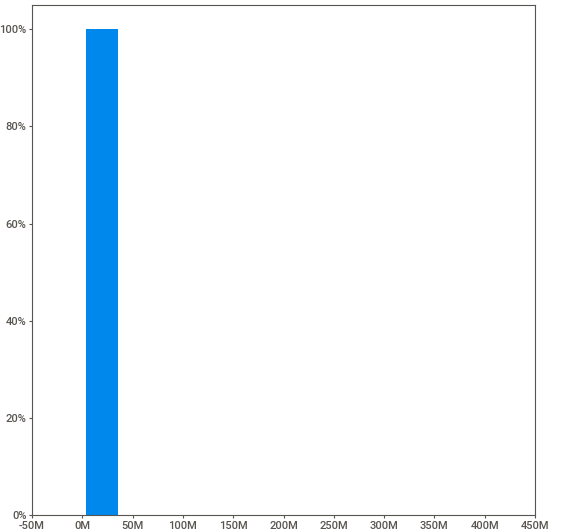
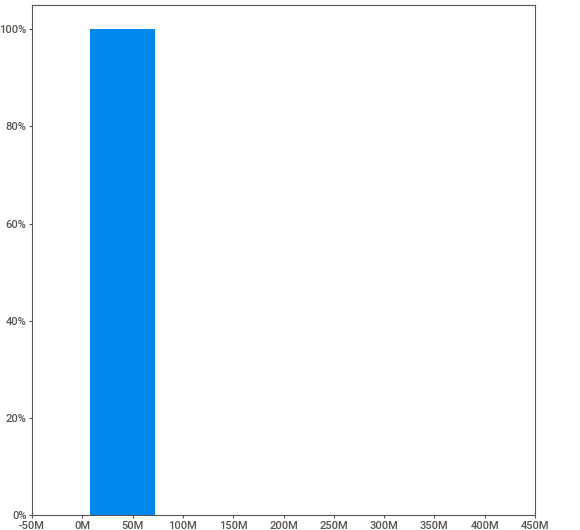
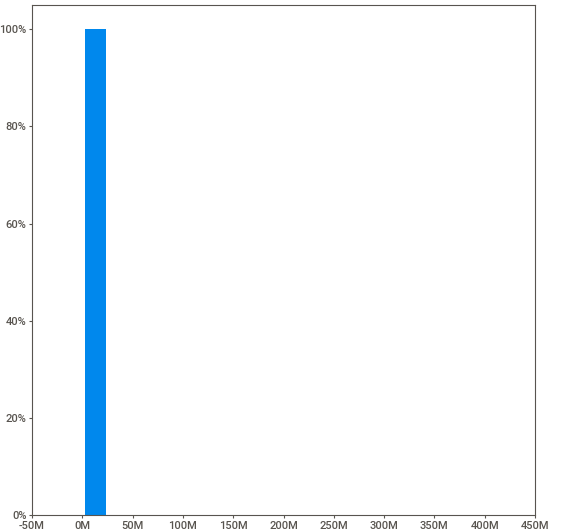
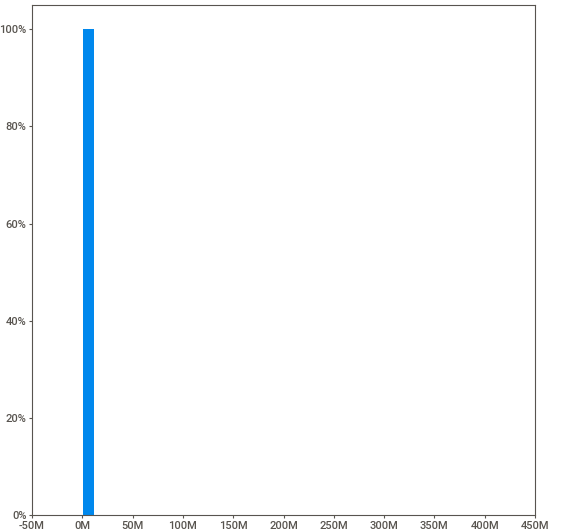
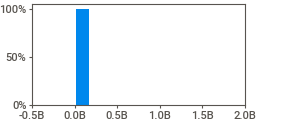
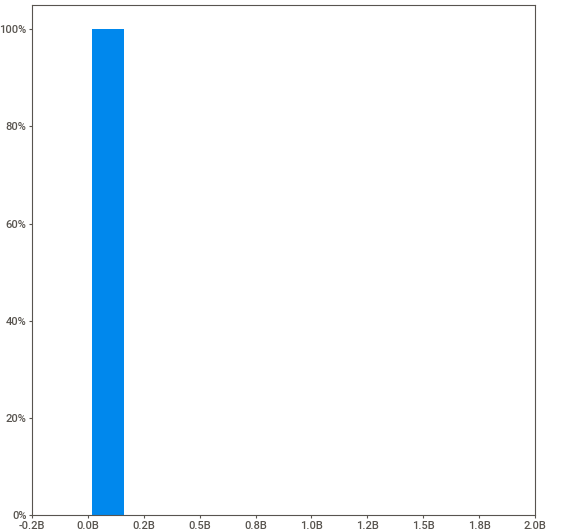
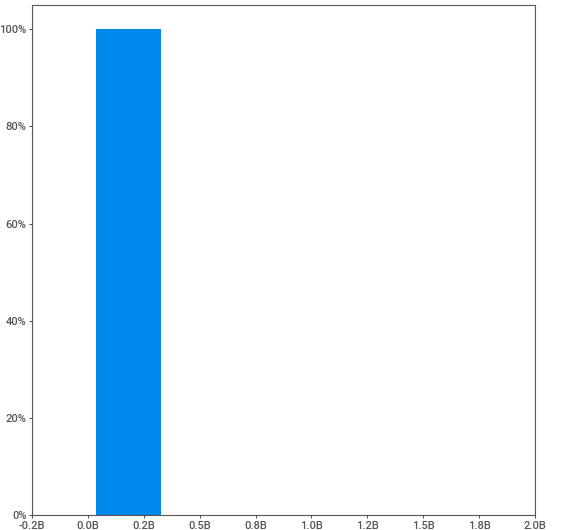
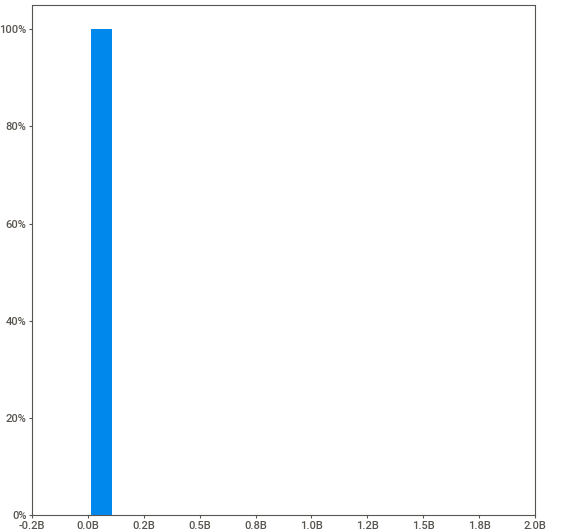
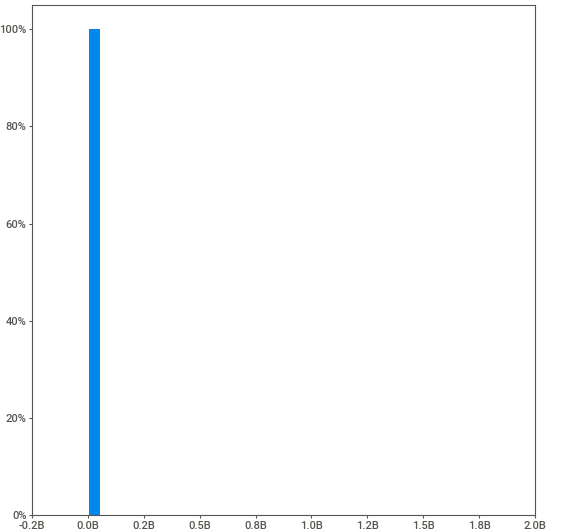
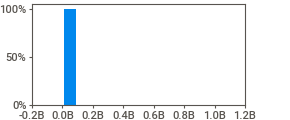
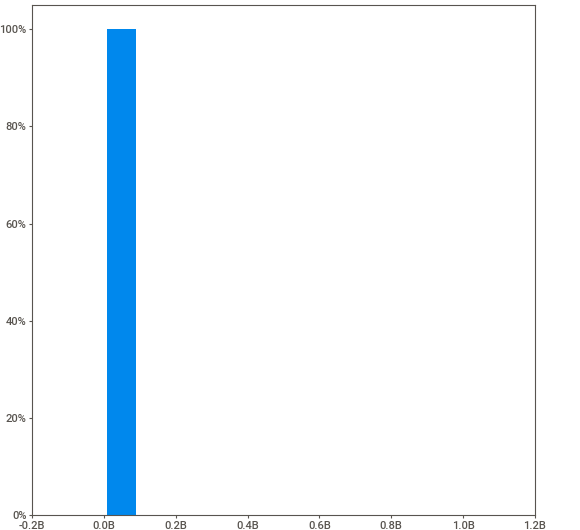
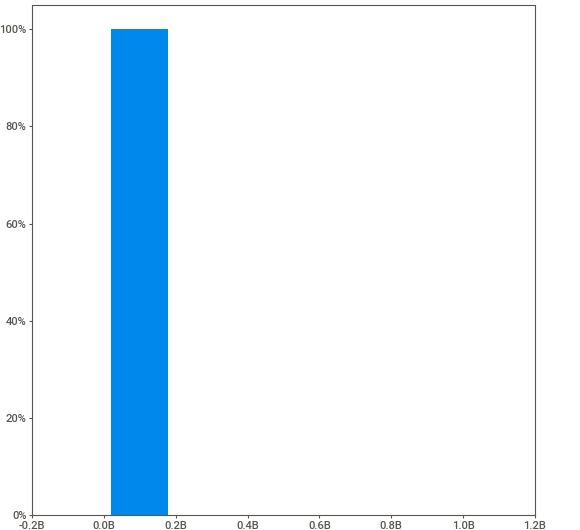
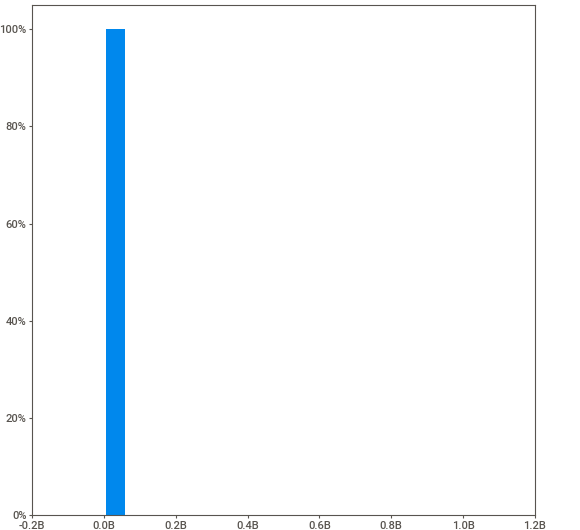
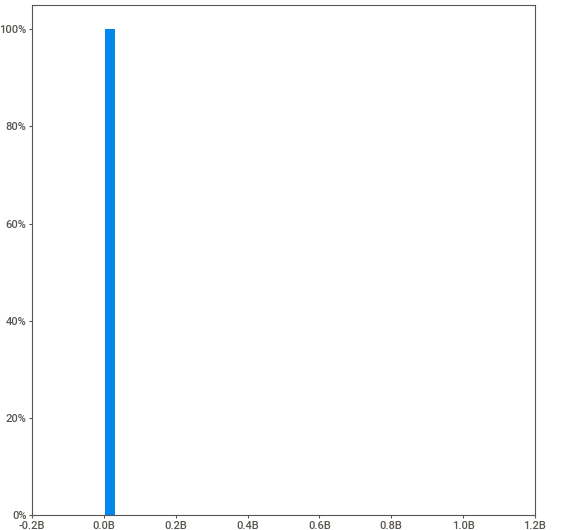
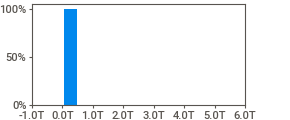
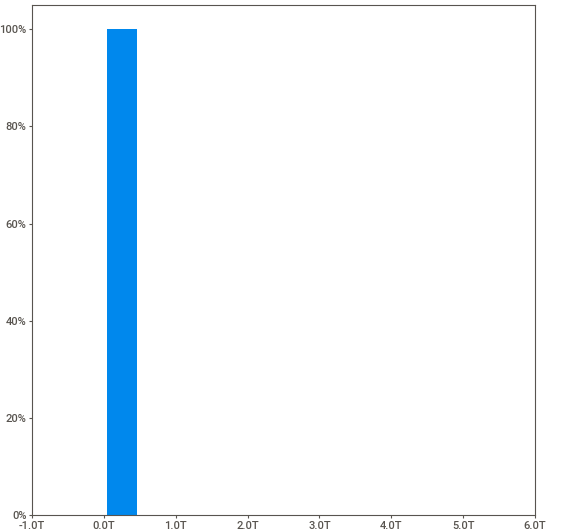
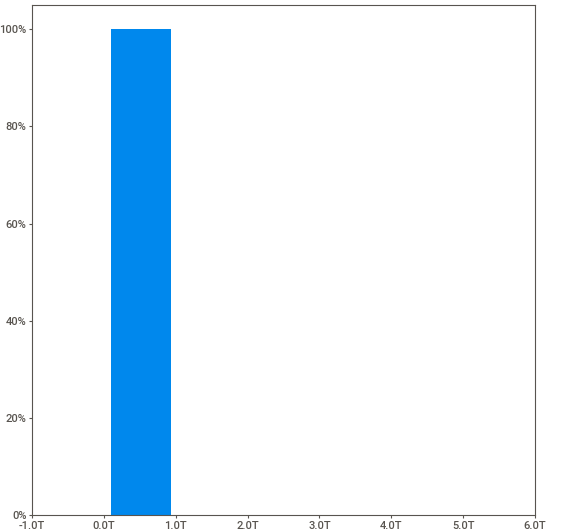
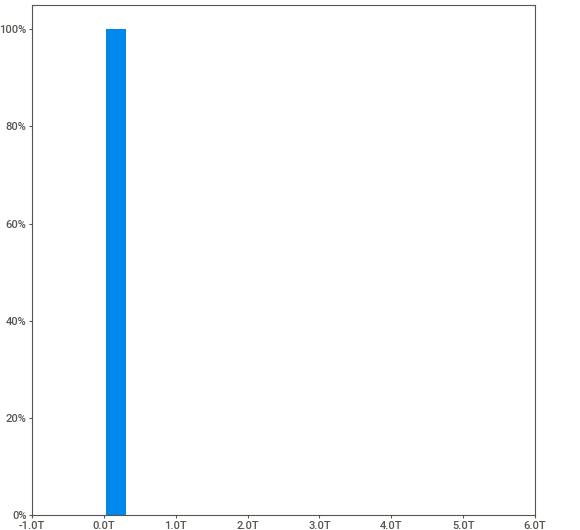
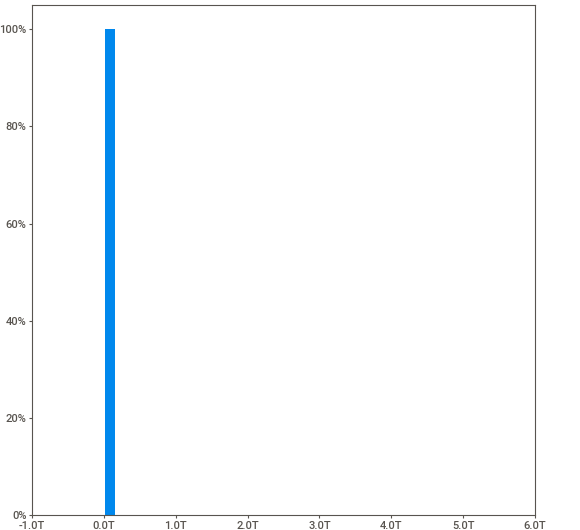
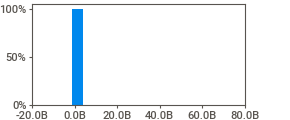
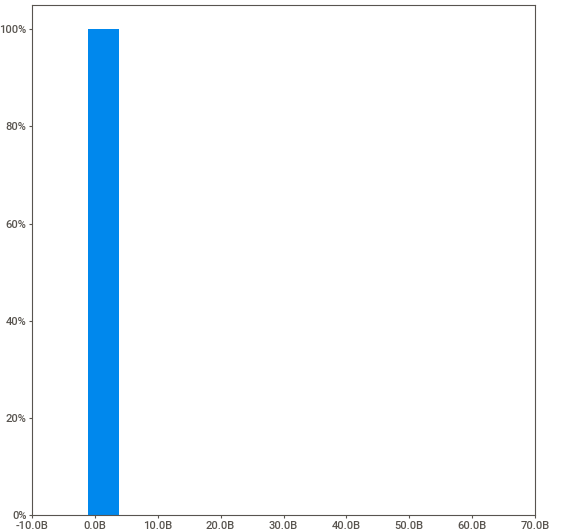
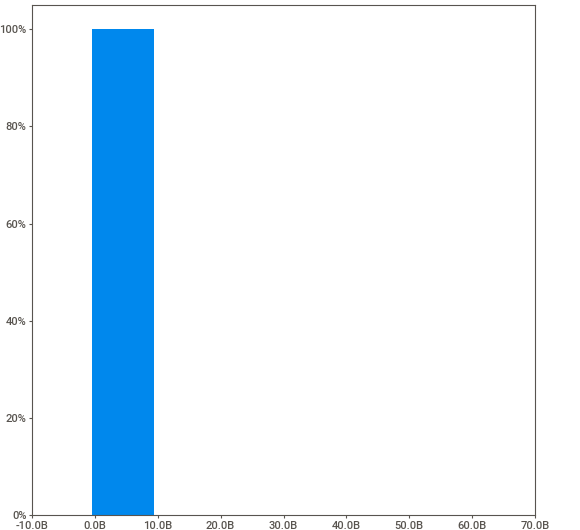
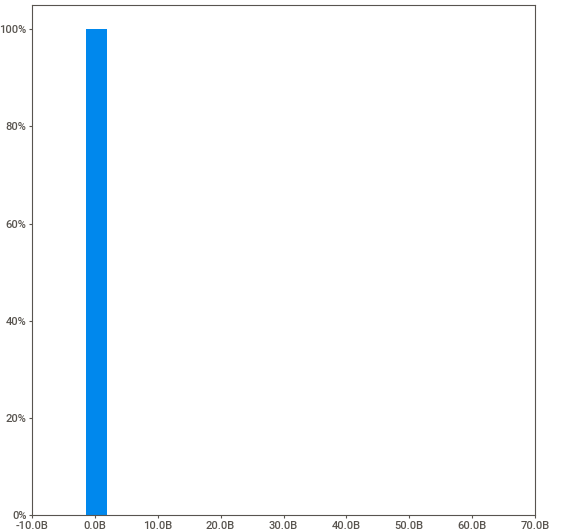
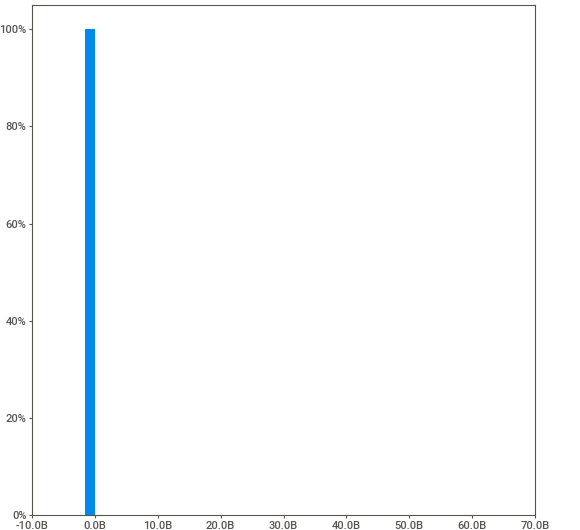
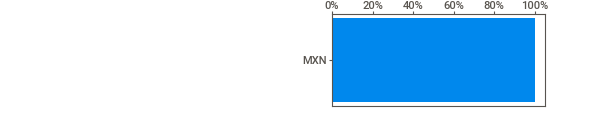
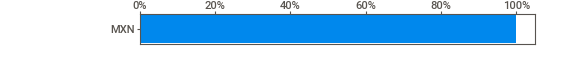
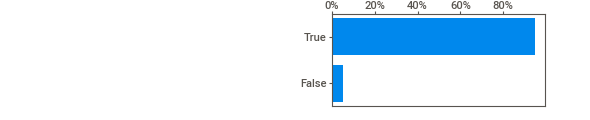
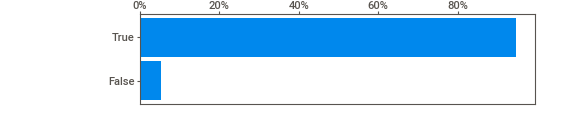
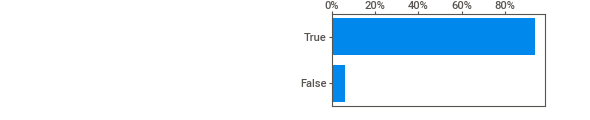
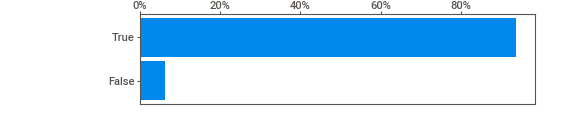
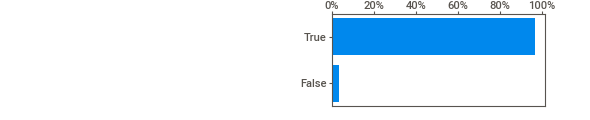
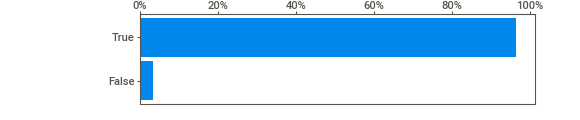
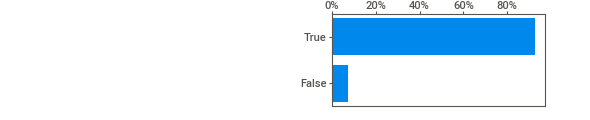
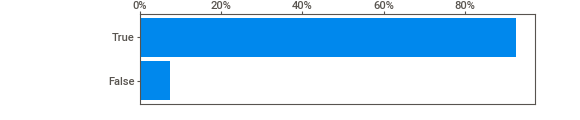
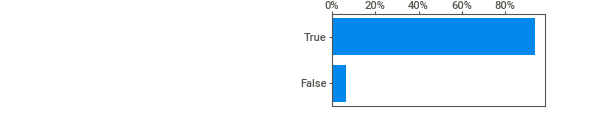
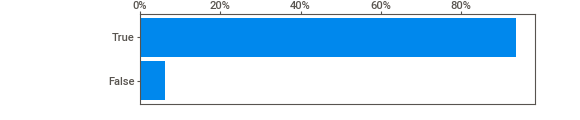
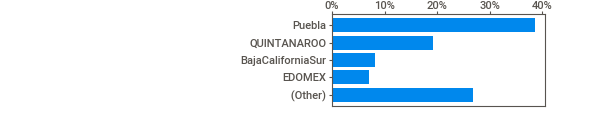
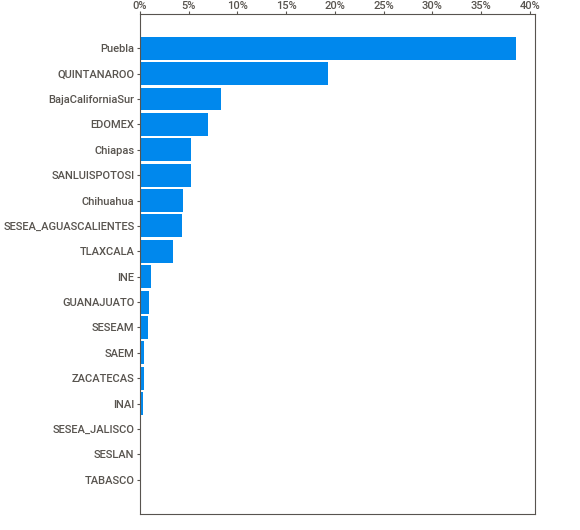
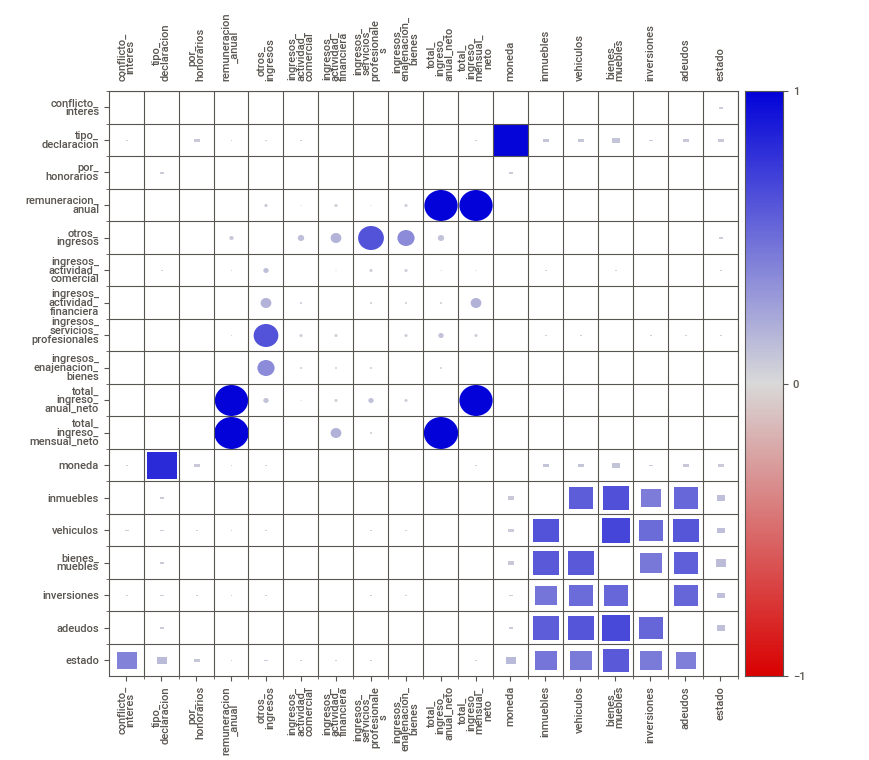
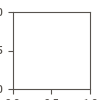

In [ ]:
report_data.show_notebook()

In [ ]:
prob_column1 = data['nombre'].value_counts(normalize=True, dropna=False)
prob_column2 = data['apellido'].value_counts(normalize=True, dropna=False)
prob_column3 = data['estado'].value_counts(normalize=True, dropna=False)
prob_column4 = data['dependencia'].value_counts(normalize=True, dropna=False)

# Calculate joint probability of having the exact same ID
joint_probability = 1.0
for col in [prob_column1, prob_column2, prob_column3, prob_column4]:
    if col.name in data.columns:
        joint_probability *= col[data[col.name]].iloc[0]

# Print or use the joint probability as needed
print(f"Joint Probability of having the exact same ID: {joint_probability}")


Joint Probability of having the exact same ID: 2.1276795599357575e-07


In [ ]:
data['nombre_completo'] = data['nombre'].astype(str) + ' '+ data['apellido'].astype(str)+' '+data['estado'].astype(str)+' '+data['dependencia'].astype(str)

In [ ]:
data.drop(['id','dependencia',
       'nombre', 'apellido', 'seg_apellido', 'correo', 'por_honorarios',
       'nivel_empleo', 'moneda',
       'inmuebles',
       'estado'], axis = 1, inplace = True)

KeyError: ignored

In [ ]:
nombres_a_eliminar = data[data['tipo_declaracion'] == 'CONCLUSIÓN']['nombre_completo'].unique()
data = data[~data['nombre_completo'].isin(nombres_a_eliminar)]

In [ ]:
duplicate_ids = data[data['tipo_declaracion'] == 'INICIAL'].duplicated('nombre_completo', keep=False)
probability = len(duplicate_ids) / len(data)
print(f"Probability of having the exact same ID for more than one person: {probability}")

Probability of having the exact same ID for more than one person: 0.16390937761599836


In [ ]:
data.columns

Index(['id', 'fecha', 'dependencia', 'conflicto_interes', 'tipo_declaracion',
       'nombre', 'apellido', 'seg_apellido', 'correo', 'por_honorarios',
       'nivel_empleo', 'fecha_inicio', 'remuneracion_anual', 'otros_ingresos',
       'ingresos_actividad_comercial', 'ingresos_actividad_financiera',
       'ingresos_servicios_profesionales', 'ingresos_enajenacion_bienes',
       'total_ingreso_anual_neto', 'total_ingreso_mensual_neto', 'moneda',
       'inmuebles', 'vehiculos', 'bienes_muebles', 'inversiones', 'adeudos',
       'estado'],
      dtype='object')

In [ ]:
data.remuneracion_anual[data.tipo_declaracion=='INICIAL'].value_counts()

Series([], Name: remuneracion_anual, dtype: int64)

In [ ]:
data.columns

Index(['fecha', 'conflicto_interes', 'tipo_declaracion', 'fecha_inicio',
       'remuneracion_anual', 'otros_ingresos', 'ingresos_actividad_comercial',
       'ingresos_actividad_financiera', 'ingresos_servicios_profesionales',
       'ingresos_enajenacion_bienes', 'total_ingreso_anual_neto',
       'total_ingreso_mensual_neto', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos', 'nombre_completo'],
      dtype='object')

In [ ]:
data['fecha_inicio'] = data['fecha_inicio'].fillna(pd.to_datetime('1900-01-01'))

<ipython-input-98-f93075b31520>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fecha_inicio'] = data['fecha_inicio'].fillna(pd.to_datetime('1900-01-01'))


In [ ]:
data.head(20)

,fecha,conflicto_interes,tipo_declaracion,fecha_inicio,remuneracion_anual,otros_ingresos,ingresos_actividad_comercial,ingresos_actividad_financiera,ingresos_servicios_profesionales,ingresos_enajenacion_bienes,total_ingreso_anual_neto,total_ingreso_mensual_neto,vehiculos,bienes_muebles,inversiones,adeudos,nombre_completo
1,2021-05-06,NaN,MODIFICACIÓN,2011-03-01,172867.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,True,True,True,ADRIAN HERNANDEZ BajaCaliforniaSur CONTRALORÍA...
2,2021-05-07,NaN,MODIFICACIÓN,2018-04-01,160000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,True,True,True,ABIGAIN YARELI HERNANDEZ BajaCaliforniaSur CON...
3,2021-05-06,NaN,MODIFICACIÓN,1992-11-01,171898.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,True,True,True,ADELFO HERNANDEZ BajaCaliforniaSur CONTRALORÍA...
4,2021-05-07,NaN,MODIFICACIÓN,2019-11-16,100000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,True,True,True,ADRIAN EMILIO MADRIGAL BajaCaliforniaSur CONTR...
5,2021-05-07,NaN,INICIAL,2021-05-07,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,True,True,True,True,ABEL LEMUS BajaCaliforniaSur CONTRALORÍA GENERAL
6,2021-05-10,NaN,MODIFICACIÓN,2008-07-16,122931.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,True,True,True,ADELAIDA SALORIO BajaCaliforniaSur CONTRALORÍA...
7,2021-05-10,NaN,MODIFICACIÓN,2010-05-01,176170.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,True,True,True,ADRIAN MARTINEZ BajaCaliforniaSur CONTRALORÍA ...
8,2021-05-11,NaN,MODIFICACIÓN,2007-10-15,274085.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,True,True,True,ADELINA COSIO BajaCaliforniaSur CONTRALORÍA GE...
9,2021-05-11,NaN,MODIFICACIÓN,2008-11-01,193511.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,True,True,True,ABEL SABIK VALENZUELA BajaCaliforniaSur CONTRA...
10,2021-05-11,NaN,MODIFICACIÓN,2010-07-10,168000.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,True,True,True,True,ADOLFO LOPEZ BajaCaliforniaSur CONTRALORÍA GEN...


In [ ]:
grouped_data = data.sort_values(['nombre_completo', 'fecha']).reset_index(drop=True)

In [ ]:
grouped_data.columns

Index(['fecha', 'conflicto_interes', 'tipo_declaracion', 'fecha_inicio',
       'remuneracion_anual', 'otros_ingresos', 'ingresos_actividad_comercial',
       'ingresos_actividad_financiera', 'ingresos_servicios_profesionales',
       'ingresos_enajenacion_bienes', 'total_ingreso_anual_neto',
       'total_ingreso_mensual_neto', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos', 'nombre_completo'],
      dtype='object')

In [ ]:
grouped_data= grouped_data[['nombre_completo','fecha', 'conflicto_interes', 'tipo_declaracion', 'fecha_inicio',
       'remuneracion_anual', 'otros_ingresos', 'ingresos_actividad_comercial',
       'ingresos_actividad_financiera', 'ingresos_servicios_profesionales',
       'ingresos_enajenacion_bienes', 'total_ingreso_anual_neto',
       'total_ingreso_mensual_neto', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos']]

In [ ]:
grouped_data.nombre_completo.value_counts()

RAUL HERNANDEZ BajaCaliforniaSur CONTRALORÍA GENERAL                              18
JUAN CARLOS GONZALEZ BajaCaliforniaSur CONTRALORÍA GENERAL                        16
MARIA GUADALUPE GONZALEZ BajaCaliforniaSur CONTRALORÍA GENERAL                    16
MARIA DE LOS ANGELES MARTINEZ BajaCaliforniaSur CONTRALORÍA GENERAL               15
MIGUEL ANGEL COTA BajaCaliforniaSur CONTRALORÍA GENERAL                           15
                                                                                  ..
JORGE LUIS LOPEZ Chiapas MUCIPIO DE PICHUCALCO, CHIAPAS                            1
JORGE LUIS LOPEZ Chiapas HONORABLE AYUNTAMIENTO MUNICIPAL DE OCOSINGO, CHIAPAS     1
JORGE LUIS LOPEZ Chiapas H. AYUNTAMIENTO DE TUXTLA GUTIERREZ                       1
JORGE LUIS LOPEZ Chiapas H. AYUNTAMIENTO                                           1
Úrsula Griseyra Antopia INE Organo Interno de Control del INE                      1
Name: nombre_completo, Length: 539352, dtype: int64

In [ ]:
grouped_data[(grouped_data.nombre_completo == 'RAUL HERNANDEZ BajaCaliforniaSur CONTRALORÍA GENERAL')&(grouped_data.tipo_declaracion == 'INICIAL')]

,fecha,conflicto_interes,tipo_declaracion,fecha_inicio,remuneracion_anual,otros_ingresos,ingresos_actividad_comercial,ingresos_actividad_financiera,ingresos_servicios_profesionales,ingresos_enajenacion_bienes,total_ingreso_anual_neto,total_ingreso_mensual_neto,vehiculos,bienes_muebles,inversiones,adeudos,nombre_completo
859853,2022-05-23,NaN,INICIAL,2022-02-14,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,True,True,True,True,RAUL HERNANDEZ BajaCaliforniaSur CONTRALORÍA G...
859855,2022-05-24,NaN,INICIAL,2021-10-01,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,True,True,True,True,RAUL HERNANDEZ BajaCaliforniaSur CONTRALORÍA G...


In [ ]:
grouped_data[(grouped_data.nombre_completo == 'PABLO HERNANDEZ')&(grouped_data.tipo_declaracion == 'INICIAL')]

,nombre_completo,fecha,conflicto_interes,tipo_declaracion,fecha_inicio,remuneracion_anual,otros_ingresos,ingresos_actividad_comercial,ingresos_actividad_financiera,ingresos_servicios_profesionales,ingresos_enajenacion_bienes,total_ingreso_anual_neto,total_ingreso_mensual_neto,vehiculos,bienes_muebles,inversiones,adeudos
694828,PABLO HERNANDEZ,2021-05-20 17:19:25,False,INICIAL,2021-05-20,NaN,NaN,NaN,0.0,NaN,0.0,NaN,8160.0,True,True,True,True
694835,PABLO HERNANDEZ,2021-05-31 23:50:47,False,INICIAL,2018-10-02,NaN,NaN,0.0,0.0,0.0,0.0,NaN,48835.0,NaN,NaN,NaN,NaN
694836,PABLO HERNANDEZ,2021-06-04 15:42:27,False,INICIAL,2013-10-01,NaN,NaN,0.0,0.0,0.0,0.0,NaN,10048.0,NaN,NaN,NaN,NaN
694837,PABLO HERNANDEZ,2021-07-19 18:19:39,False,INICIAL,2018-01-04,NaN,NaN,0.0,0.0,0.0,0.0,NaN,6988.0,NaN,NaN,NaN,NaN
694839,PABLO HERNANDEZ,2021-10-25 00:00:00,False,INICIAL,2021-09-06,NaN,NaN,0.0,0.0,0.0,NaN,NaN,7028.0,True,True,True,True
694840,PABLO HERNANDEZ,2021-11-04 19:09:13,False,INICIAL,2021-11-04,NaN,NaN,NaN,0.0,NaN,0.0,NaN,7178.0,True,True,True,True
694841,PABLO HERNANDEZ,2021-12-14 00:00:00,False,INICIAL,2021-10-01,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,True,True,True,True
694842,PABLO HERNANDEZ,2021-12-23 00:00:00,False,INICIAL,2021-10-04,NaN,NaN,0.0,0.0,0.0,NaN,NaN,3900.0,True,True,True,True
694860,PABLO HERNANDEZ,2022-06-15 00:00:00,False,INICIAL,2022-06-01,NaN,NaN,0.0,0.0,0.0,NaN,NaN,5200.0,True,True,True,True
694861,PABLO HERNANDEZ,2022-07-27 00:00:00,False,INICIAL,2022-03-01,NaN,NaN,0.0,0.0,0.0,NaN,NaN,5600.0,True,True,True,True


In [ ]:
iniciales_repetidas = data[data['tipo_declaracion'] == 'INICIAL']
nombres_duplicados = iniciales_repetidas[iniciales_repetidas.duplicated(subset=['nombre_completo', 'tipo_declaracion'], keep=False)]['nombre_completo'].unique()

['ALEJANDRA CESEÑA BajaCaliforniaSur CONTRALORÍA GENERAL'
 'ALONDRA JUDITH JUAREZ BajaCaliforniaSur CONTRALORÍA GENERAL'
 'ANGEL NELSON SALGADO BajaCaliforniaSur CONTRALORÍA GENERAL' ...
 'RAFAEL CERVANTES TLAXCALA MUNICIPIO DE APIZACO'
 'SANDRA RAMOS TLAXCALA MUNICIPIO SAN PABLO DEL MONTE'
 'FRANCISCO JAVIER GUAPO ZACATECAS PJZAC']


In [ ]:
len(nombres_duplicados)

3900

In [ ]:
def convert_nan_false_true_to_binary(value):
    if pd.isna(value) or value is False:
        return 0
    elif value is True:
        return 1
    else:
        return value

In [ ]:
grouped_data.columns

Index(['fecha', 'conflicto_interes', 'tipo_declaracion', 'fecha_inicio',
       'remuneracion_anual', 'otros_ingresos', 'ingresos_actividad_comercial',
       'ingresos_actividad_financiera', 'ingresos_servicios_profesionales',
       'ingresos_enajenacion_bienes', 'total_ingreso_anual_neto',
       'total_ingreso_mensual_neto', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos', 'nombre_completo'],
      dtype='object')

In [ ]:
grouped_data.ingresos_actividad_comercial.value_counts

<bound method IndexOpsMixin.value_counts of 0          0.0
1          0.0
2          NaN
3          0.0
4          0.0
          ... 
1011798    0.0
1011799    NaN
1011800    NaN
1011801    NaN
1011802   -1.0
Name: ingresos_actividad_comercial, Length: 1011803, dtype: float64>

In [ ]:
grouped_data[['conflicto_interes', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos']] = grouped_data[['conflicto_interes', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos']].applymap(convert_nan_false_true_to_binary)

In [ ]:
grouped_data.ingresos_actividad_comercial.value_counts()

 0.0         589720
-1.0           7932
 10000.0        268
 5000.0         195
 20000.0        193
              ...  
 57104.0          1
 110310.0         1
 121000.0         1
 2898.0           1
 4829.0           1
Name: ingresos_actividad_comercial, Length: 5759, dtype: int64

In [ ]:
grouped_data.ingresos_actividad_financiera.value_counts()

 0.0        983383
-1.0          7714
 1000.0         91
 5000.0         82
 1.0            71
             ...  
 1285.0          1
 56373.0         1
 10158.0         1
 51400.0         1
 2223.0          1
Name: ingresos_actividad_financiera, Length: 6044, dtype: int64

In [ ]:
grouped_data.ingresos_servicios_profesionales.value_counts()

 0.0         582678
-1.0           7919
 10000.0        427
 5000.0         295
 20000.0        279
              ...  
 598692.0         1
 50395.0          1
 373864.0         1
 348030.0         1
 229518.0         1
Name: ingresos_servicios_profesionales, Length: 11499, dtype: int64

In [ ]:
grouped_data.total_ingreso_mensual_neto.value_counts()

-1.0         13358
 0.0          9624
 6000.0       3585
 8000.0       3496
 5000.0       2724
             ...  
 61831.0         1
 181308.0        1
 240037.0        1
 81960.0         1
 222895.0        1
Name: total_ingreso_mensual_neto, Length: 35400, dtype: int64

In [ ]:
grouped_data.total_ingreso_anual_neto.value_counts()

 0.0         79980
-1.0         43355
 96000.0      1706
 120000.0     1538
 72000.0      1252
             ...  
 429649.0        1
 309907.0        1
 317702.0        1
 657290.0        1
 272906.0        1
Name: total_ingreso_anual_neto, Length: 331673, dtype: int64

In [ ]:
grouped_data.fillna(0,inplace=True)

In [ ]:
porcentaje_nan_por_columna = (grouped_data.isna().sum() / len(data)) * 100
df_porcentaje_nan = pd.DataFrame({
    'Columna': porcentaje_nan_por_columna.index,
    'Porcentaje NaN': porcentaje_nan_por_columna.values
})
print(df_porcentaje_nan)

                             Columna  Porcentaje NaN
0                              fecha             0.0
1                  conflicto_interes             0.0
2                   tipo_declaracion             0.0
3                       fecha_inicio             0.0
4                 remuneracion_anual             0.0
5                     otros_ingresos             0.0
6       ingresos_actividad_comercial             0.0
7      ingresos_actividad_financiera             0.0
8   ingresos_servicios_profesionales             0.0
9        ingresos_enajenacion_bienes             0.0
10          total_ingreso_anual_neto             0.0
11        total_ingreso_mensual_neto             0.0
12                         vehiculos             0.0
13                    bienes_muebles             0.0
14                       inversiones             0.0
15                           adeudos             0.0
16                   nombre_completo             0.0


In [ ]:
porcentaje_minus1_por_columna = (grouped_data.eq(-1).sum() / len(data)) * 100
df_porcentaje_minus1 = pd.DataFrame({
    'Columna': porcentaje_minus1_por_columna.index,
    'Porcentaje -1': porcentaje_minus1_por_columna.values
})
print(df_porcentaje_minus1)

                             Columna  Porcentaje -1
0                              fecha       0.000000
1                  conflicto_interes       0.000000
2                   tipo_declaracion       0.000000
3                       fecha_inicio       0.000000
4                 remuneracion_anual       0.000000
5                     otros_ingresos       0.000198
6       ingresos_actividad_comercial       0.783947
7      ingresos_actividad_financiera       0.762401
8   ingresos_servicios_profesionales       0.782662
9        ingresos_enajenacion_bienes       0.520457
10          total_ingreso_anual_neto       4.284925
11        total_ingreso_mensual_neto       1.320217
12                         vehiculos       0.000000
13                    bienes_muebles       0.000000
14                       inversiones       0.000000
15                           adeudos       0.000000
16                   nombre_completo       0.000000


In [ ]:
grouped_data.tipo_declaracion[(grouped_data.remuneracion_anual == 0)&(grouped_data.total_ingreso_mensual_neto > 0)].value_counts()

INICIAL         142796
MODIFICACIÓN        12
Name: tipo_declaracion, dtype: int64

In [ ]:
grouped_data.tipo_declaracion[(grouped_data.remuneracion_anual == 0)].value_counts()

INICIAL         165844
MODIFICACIÓN     11112
Name: tipo_declaracion, dtype: int64

In [ ]:
grouped_data.tipo_declaracion[(grouped_data.remuneracion_anual == -1)].value_counts()

Series([], Name: tipo_declaracion, dtype: int64)

In [ ]:
grouped_data[grouped_data.ingresos_actividad_comercial <0]

,fecha,conflicto_interes,tipo_declaracion,fecha_inicio,remuneracion_anual,otros_ingresos,ingresos_actividad_comercial,ingresos_actividad_financiera,ingresos_servicios_profesionales,ingresos_enajenacion_bienes,total_ingreso_anual_neto,total_ingreso_mensual_neto,vehiculos,bienes_muebles,inversiones,adeudos,nombre_completo
177,2022-11-07 18:15:24,0,MODIFICACIÓN,2020-01-16,1021542.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,0,0,0,0,AARON DAVID FERNANDEZ INE Organo Interno de Co...
224,2022-11-08 10:07:10,0,MODIFICACIÓN,2021-01-16,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1,1,1,0,AARON ENRIQUE JARAMILLO INE Organo Interno de ...
283,2022-11-07 18:03:39,0,MODIFICACIÓN,2014-01-01,15263292.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,1,1,1,1,AARON FRANCO INE Organo Interno de Control del...
758,2022-11-03 23:37:24,0,MODIFICACIÓN,2018-04-01,896818.0,0.0,-1.0,-1.0,-1.0,-1.0,896818.0,NaN,0,0,0,0,ABAN BARUCH REBOLLAR INE Organo Interno de Con...
787,2022-11-07 16:56:30,0,MODIFICACIÓN,2019-11-01,276289.0,30588.0,-1.0,-1.0,30588.0,-1.0,-1.0,NaN,1,1,1,1,ABDEL RENE DZUL INE Organo Interno de Control ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011610,2022-11-07 06:12:25,0,INICIAL,2022-03-07,NaN,NaN,-1.0,-1.0,-1.0,NaN,NaN,-1.0,1,1,1,1,erika jazmin bautista INE Organo Interno de Co...
1011624,2022-11-06 01:41:19,0,INICIAL,2022-02-05,NaN,NaN,-1.0,-1.0,-1.0,NaN,NaN,-1.0,1,1,1,1,ÁGUEDA PAOLA ARAGÓN INE Organo Interno de Cont...
1011742,2022-11-07 15:50:22,0,MODIFICACIÓN,2019-08-16,200304.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,0,1,1,0,ÁNGEL RAÚL CRUZ INE Organo Interno de Control ...
1011779,2022-11-07 17:35:03,0,MODIFICACIÓN,2017-11-16,619424.0,29840.0,-1.0,1921.0,-1.0,-1.0,-1.0,NaN,0,1,0,0,ÉRIC ITZCÓATL ENRÍQUEZ INE Organo Interno de C...


In [ ]:
condiciones = (grouped_data['remuneracion_anual'] == 0) & (grouped_data['total_ingreso_mensual_neto'] != 0)
grouped_data.loc[condiciones, 'remuneracion_anual'] = grouped_data.loc[condiciones, 'total_ingreso_mensual_neto'] * 12

In [ ]:
grouped_data.to_csv('/content/gdrive/MyDrive/Prueba técnica/Dataton/grouped_data.csv', index=False)

In [ ]:
len(nombres_duplicados)

3900

In [ ]:
grouped_data = grouped_data[~grouped_data['nombre_completo'].isin(nombres_duplicados)]

In [ ]:
grouped_data[grouped_data.remuneracion_anual <= 0]

,fecha,conflicto_interes,tipo_declaracion,fecha_inicio,remuneracion_anual,otros_ingresos,ingresos_actividad_comercial,ingresos_actividad_financiera,ingresos_servicios_profesionales,ingresos_enajenacion_bienes,total_ingreso_anual_neto,total_ingreso_mensual_neto,vehiculos,bienes_muebles,inversiones,adeudos,nombre_completo
2,2022-06-15 22:56:58,0,INICIAL,2019-11-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,.ALAN CRUZ Puebla DIRECCION OPERATIVA
4,2023-02-09 11:02:02,0,INICIAL,2023-01-06,-12.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1,1,1,1,?SCAR JOSU? GARC?A EDOMEX Instituto Electoral ...
32,2023-05-22 00:00:00,0,INICIAL,2023-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,AARON AGUILAR TLAXCALA MUNICIPIO DE SANTA APOL...
36,2022-03-10 00:03:00,0,INICIAL,2022-01-16,-12.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1,1,1,1,AARON ALAN HERNANDEZ EDOMEX Poder Legislativo
68,2023-03-31 10:23:23,0,INICIAL,2023-02-07,-12.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1,1,1,1,AARON ALVAREZ EDOMEX Universidad Autónoma del ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011662,2023-05-10 02:05:49,0,MODIFICACIÓN,2022-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,ÁNGEL ABRAHAM RAMÍREZ Puebla Ayuntamiento de S...
1011667,2021-05-03 12:59:06,0,INICIAL,1977-12-01,-12.0,0.0,0.0,1876.0,0.0,0.0,0.0,-1.0,1,1,1,1,ÁNGEL ARMANDO ALBÍTER EDOMEX Universidad Autón...
1011731,2023-05-11 19:40:51,0,MODIFICACIÓN,2005-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,1,ÁNGEL MENDOZA Puebla DIRECCION DE OPERACIONES ...
1011793,2021-05-10 09:53:32,0,INICIAL,2006-04-15,-12.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1,1,1,1,ÓSCAR HUICOCHEA EDOMEX Universidad Autónoma de...


In [ ]:
mask = grouped_data.groupby('nombre_completo')['remuneracion_anual'].transform('max') > 0
filtered_data = grouped_data[mask]

In [ ]:
filtered_data['fecha'] = pd.to_datetime(filtered_data['fecha'], errors='coerce')
filtered_data = filtered_data.dropna(subset=['fecha'])
filtered_data = filtered_data.sort_values(by=['fecha'])
# Plot line charts for each 'nombre_completo'
for name, group in filtered_data.groupby('nombre_completo'):
    plt.plot(group['fecha'], group['remuneracion_anual'], label=name)

# Add labels and title
plt.xlabel('Fecha')
plt.ylabel('Remuneración Anual')
plt.title('Remuneración Anual Over Time')
plt.legend()
plt.show()

<ipython-input-102-e45b785604b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['fecha'] = pd.to_datetime(filtered_data['fecha'], errors='coerce')


In [ ]:
grouped_data.columns

Index(['fecha', 'conflicto_interes', 'tipo_declaracion', 'fecha_inicio',
       'remuneracion_anual', 'otros_ingresos', 'ingresos_actividad_comercial',
       'ingresos_actividad_financiera', 'ingresos_servicios_profesionales',
       'ingresos_enajenacion_bienes', 'total_ingreso_anual_neto',
       'total_ingreso_mensual_neto', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos', 'nombre_completo'],
      dtype='object')

In [ ]:
entropia_matriz = pd.DataFrame(index=grouped_data[['conflicto_interes', 'tipo_declaracion',
       'remuneracion_anual', 'otros_ingresos', 'ingresos_actividad_comercial',
       'ingresos_actividad_financiera', 'ingresos_servicios_profesionales',
       'ingresos_enajenacion_bienes', 'total_ingreso_anual_neto',
       'total_ingreso_mensual_neto', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos']] , columns=grouped_data[['conflicto_interes', 'tipo_declaracion',
       'remuneracion_anual', 'otros_ingresos', 'ingresos_actividad_comercial',
       'ingresos_actividad_financiera', 'ingresos_servicios_profesionales',
       'ingresos_enajenacion_bienes', 'total_ingreso_anual_neto',
       'total_ingreso_mensual_neto', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos']])

# Calcular la entropía condicional
for col1 in grouped_data[['conflicto_interes', 'tipo_declaracion',
       'remuneracion_anual', 'otros_ingresos', 'ingresos_actividad_comercial',
       'ingresos_actividad_financiera', 'ingresos_servicios_profesionales',
       'ingresos_enajenacion_bienes', 'total_ingreso_anual_neto',
       'total_ingreso_mensual_neto', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos']]:
    for col2 in grouped_data[['conflicto_interes', 'tipo_declaracion',
       'remuneracion_anual', 'otros_ingresos', 'ingresos_actividad_comercial',
       'ingresos_actividad_financiera', 'ingresos_servicios_profesionales',
       'ingresos_enajenacion_bienes', 'total_ingreso_anual_neto',
       'total_ingreso_mensual_neto', 'vehiculos', 'bienes_muebles',
       'inversiones', 'adeudos']]:
        # Si las variables son diferentes, calcula la entropía condicional
        if col1 != col2:
            # Crear tabla de contingencia
            contingencia = pd.crosstab(grouped_data[col1], grouped_data[col2], margins=True, margins_name="Total")

            # Calcular la entropía condicional
            entropia_condicional = 0
            for i in contingencia.index[:-1]:
                for j in contingencia.columns[:-1]:
                    p_xy = contingencia.loc[i, j] / contingencia.loc["Total", "Total"]
                    p_x = contingencia.loc[i, "Total"] / contingencia.loc["Total", "Total"]
                    p_y_dado_x = p_xy / p_x
                    entropia_condicional += p_xy * np.log2(p_y_dado_x)

            # Almacenar el resultado en la matriz
            entropia_matriz.loc[col1, col2] = entropia_condicional

# Mostrar la matriz de entropía condicional
print("Matriz de Entropía Condicional:")
print(entropia_matriz)

KeyboardInterrupt: ignored

In [ ]:
# Crear gráficos de barras con Seaborn
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(ax=axes[0], x='Entropía', y='Variable', data=entropy_df_part1, palette='viridis')
axes[0].set_title('Entropía de Variables No Numéricas - Parte 1')

sns.barplot(ax=axes[1], x='Entropía', y='Variable', data=entropy_df_part2, palette='viridis')
axes[1].set_title('Entropía de Variables No Numéricas - Parte 2')

sns.barplot(ax=axes[2], x='Entropía', y='Variable', data=entropy_df_part3, palette='viridis')
axes[2].set_title('Entropía de Variables No Numéricas - Parte 3')

plt.tight_layout()
plt.show()


<ipython-input-70-47b943bff1bd>:20: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = entropy_df_combined_all.pivot('Variable', 'Parte', 'Entropía')


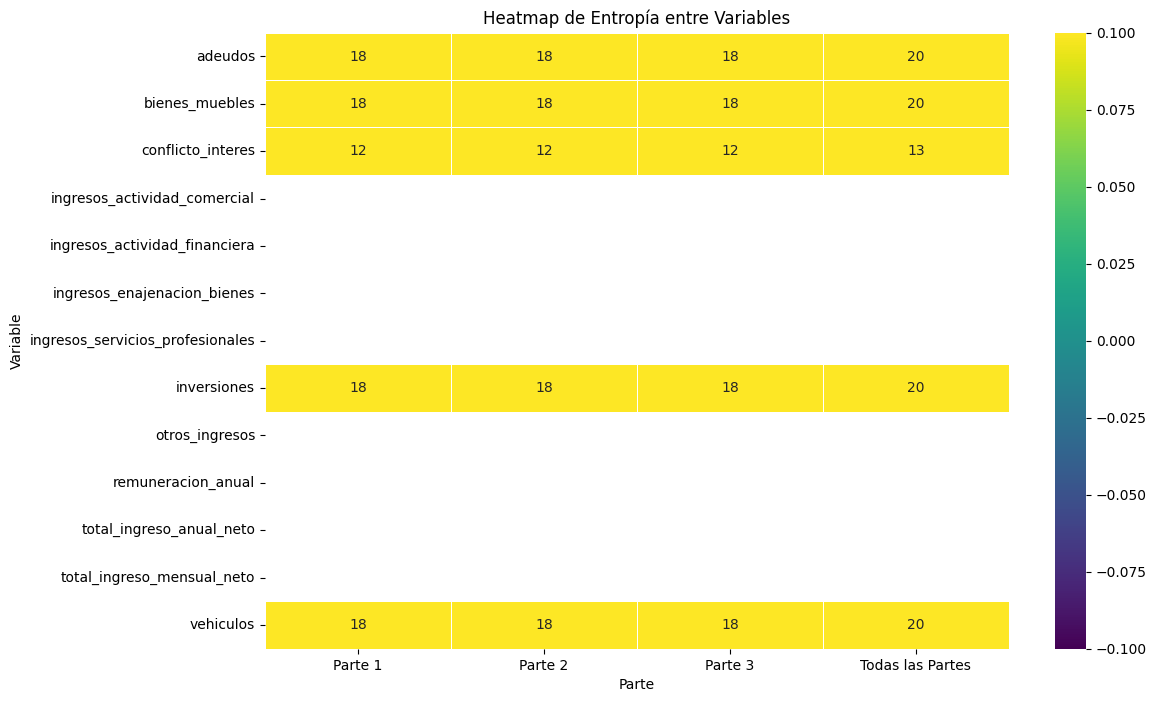

In [ ]:
all_entropies = {}
for column in columns_to_calculate_entropy:
    grouped_data[column].fillna('NA', inplace=True)
    all_entropies[column] = entropy(grouped_data[column], base=2)
entropy_df_all = pd.DataFrame({'Variable': list(all_entropies.keys()), 'Entropía': list(all_entropies.values())})
entropy_df_combined = pd.concat([
    entropy_df_part1.assign(Parte='Parte 1'),
    entropy_df_part2.assign(Parte='Parte 2'),
    entropy_df_part3.assign(Parte='Parte 3')
])

# Crear un DataFrame de entropía para todas las variables y cada parte
entropy_df_combined_all = pd.concat([
    entropy_df_combined,
    entropy_df_all.assign(Parte='Todas las Partes')
])

# Crear un heatmap con Seaborn
plt.figure(figsize=(12, 8))
heatmap_data = entropy_df_combined_all.pivot('Variable', 'Parte', 'Entropía')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap de Entropía entre Variables')
plt.show()

In [ ]:
all_entropies = {}
for column in columns_to_calculate_entropy:
    grouped_data[column].fillna('NA', inplace=True)
    all_entropies[column] = entropy(grouped_data[column], base=2)

# Crear DataFrame de entropía para todas las variables
entropy_df_all = pd.DataFrame({'Variable': list(all_entropies.keys()), 'Entropía': list(all_entropies.values())})

# Crear un DataFrame combinado
entropy_df_combined_all = entropy_df_all.assign(Parte='Todas las Partes')

# Crear un heatmap con Seaborn
plt.figure(figsize=(12, 8))
heatmap_data = entropy_df_combined_all.pivot('Variable', 'Variable', 'Entropía')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', linewidths=.5)
plt.title('Heatmap de Entropía entre Variables')
plt.show()

<ipython-input-71-c93c1cab7957>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = entropy_df_combined_all.pivot('Variable', 'Variable', 'Entropía')


ValueError: ignored

<Figure size 1200x800 with 0 Axes>